# 📓 Lab Notebook 1: Definition of the Workspace
**Author:** Martín Campillo \
**Project:** Algorithmic Trading Bot (ProjectAT) \
**Date:** 21 / 11 / 25

## 🎯 Objective: 
This notebook's objective is to define three of the main pillars of the trading environment:
1. **Market Selection.** 
2. **Asset Selection.**
3. **Exchange Selection.**

# 📈 Market Selection 

The market in which the analisis is going to be made is crucial since every market has his own features. For this project I have chosen the crypto and forex markets. The main reason of this is that both markets offer large amounts of free data, which is best for the objective of this project. 
Now, let's compare both markets features.

## ₿ Crypto vs Forex 💲

| **Feature** | **Forex** | **Crypto** |
|---------|--------|--------|
| **Data avaiability** | High (Broker API) | **High (ccxt)** |
| **Data price** | **Free** | **Free** |
| **Volativity** | **Low** | Very high |
| **Liquidity** | **Very high** | **Very high (top coins)** |
| **Continuity** | 24/5 | **24/7** |
| **Transaction price** | **Very low (variable)** | Low/Medium (fixed)|
| **Volume Data** | No (Decentralized) | **Yes (Centralized)** |

# €/💲 Asset Selection 
The coins that are going to be analized are bitcoin for the crypto market and eur/usd for the forex market. Those coins are the ones that suits best for this proyect. Bitcoin is known as the king of the crypto pairs, and inside the forex market, the pair eur/usd is the most liquid one. \
Let's compare them visualizing some of their features.


## 🖨️ Importing and preparing data
We have to first import and prepare data so that we can make useful graph to visualize defferences in both assets.




In [100]:
!pip install pandas matplotlib seaborn numpy
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [101]:
# We create the dataframe with the eur/usd data from the csv file
df_eurusd = pd.read_csv('../data/eurusd_1h_2024.csv', header=0, skiprows=[1, 2])
df_eurusd.set_index(['Date'], inplace=True)
df_eurusd.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
print('✅ Data loaded successfully!')
# We do the same with bitcoin data
df_btcusd = pd.read_csv('../data/btcusdt_1h_2024.csv')
df_btcusd.set_index(['Date'], inplace=True)
print('✅ Data loaded successfully!')
# We convert data to float for numerical analysis
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_eurusd[cols] = df_eurusd[cols].apply(pd.to_numeric, errors='coerce')
df_btcusd[cols] = df_btcusd[cols].astype(float)
# We sustarct the timezone information to make both dataframes compatible
df_eurusd.index = pd.to_datetime(df_eurusd.index)  
df_btcusd.index = pd.to_datetime(df_btcusd.index)
if df_eurusd.index.tz is not None:
    df_eurusd.index = df_eurusd.index.tz_localize(None)

if df_btcusd.index.tz is not None:
    df_btcusd.index = df_btcusd.index.tz_localize(None)

print("✅ Zonas horarias eliminadas. Ahora ambos son compatibles.")
print('✅ Data types converted to float.')
# We drop missing values
df_eurusd.dropna(inplace=True)
df_btcusd.dropna(inplace=True)
print('✅ Missing values dropped.')
# We align the data of both tables
df_aligned = pd.concat([df_eurusd['Close'], df_btcusd['Close']], axis=1, join='inner')
df_aligned.columns = ['EUR_Close', 'BTC_Close']
df_aligned.reset_index( inplace=True)
print('✅ Data aligned successfully.')

✅ Data loaded successfully!
✅ Data loaded successfully!
✅ Zonas horarias eliminadas. Ahora ambos son compatibles.
✅ Data types converted to float.
✅ Missing values dropped.
✅ Data aligned successfully.


## 💸 Volatility Graph

This graph comapres the volativity of both assets.

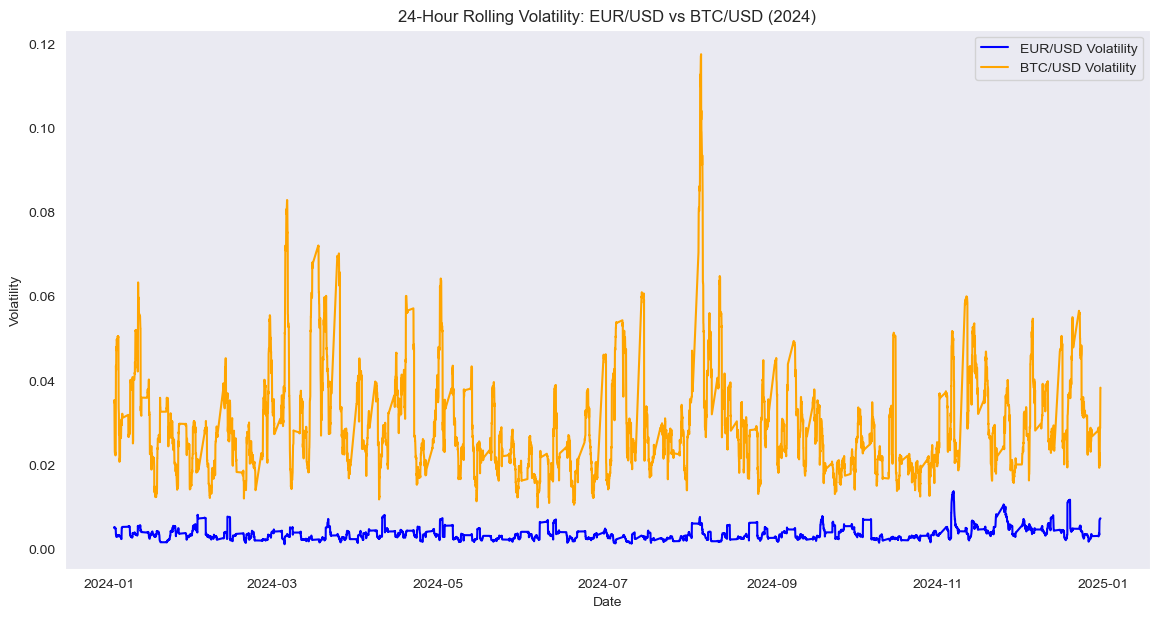

In [102]:
# Volatility Graph 

plt.figure(figsize=(14, 7))
# Calculate rolling volatility 
df_aligned['EUR_Returns'] = df_aligned['EUR_Close'].pct_change()
df_aligned['BTC_Returns'] = df_aligned['BTC_Close'].pct_change()
df_aligned['EUR_Volatility'] = df_aligned['EUR_Returns'].rolling(window=24).std() * np.sqrt(24)  # 24-hour rolling volatility
df_aligned['BTC_Volatility'] = df_aligned['BTC_Returns'].rolling(window=24).std() * np.sqrt(24)  # 24-hour rolling volatility
plt.plot(df_aligned['Date'], df_aligned['EUR_Volatility'], label='EUR/USD Volatility', color='blue')
plt.plot(df_aligned['Date'], df_aligned['BTC_Volatility'], label='BTC/USD Volatility', color='orange')
plt.title('24-Hour Rolling Volatility: EUR/USD vs BTC/USD (2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()  

As we can se, bitcoin has a higher volativity than the pair eur/usd. This is perfect since it allows us to create different strategies.

## ~ Correlation Graph
This graph is extremely important since a correlation between both assets would be fatal. If both assets were correlated, it wouldn't make sense to create different strategies for the different assets.

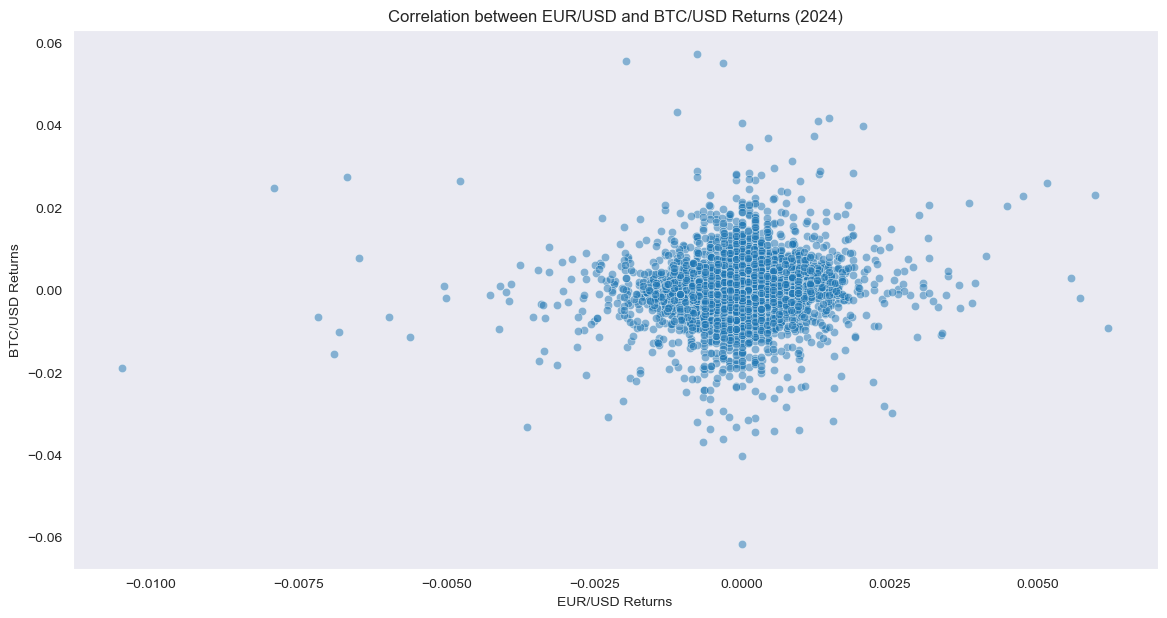

In [104]:
# Correlation Graph
plt.figure(figsize=(14, 7))
sns.scatterplot(x='EUR_Returns', y='BTC_Returns', data=df_aligned, alpha=0.5)
plt.title('Correlation between EUR/USD and BTC/USD Returns (2024)')
plt.xlabel('EUR/USD Returns')
plt.ylabel('BTC/USD Returns')
plt.grid()
plt.show()  


Thankfully, it is crystal clear that both assets are not correlated.

# 🏦 Exchange Selection
This step is key for especially for the pair eur/usd. As forex is a descentralized market, each broker offers data that differs slightly from one to another. Nevertheless, differing "slightly" makes a big difference if a model is trained with data of a first broker, and then used in a second one. Therefore, for this project I am going to choose OANDA, which suits best for python projects.
Data of bitcoin is the same for every source. For this I am going to use the ccxt python library. It allows to obtain bitcoin data from lots of APIs in a few lines of code.

### NOTES
Even though I have first choice of the asset and the exchange, I will change my decisions if I consider that other options are better.